In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
% matplotlib inline

In [2]:
!pwd

/home/jingang/Desktop/COS_lite/COS_Lite/Test


In [3]:
sys.path.append('/home/jingang/Desktop/COS_lite/COS_Lite/')

In [4]:
from Simulation import Ornstein_Uhlenbeck
from Simulation import Generic_functions
from Data import Trade_book
from Data import Player
from Model import Strategy
from Model import SLA

In [5]:
ou = Ornstein_Uhlenbeck()
trade_cost = lambda x: Generic_functions.trading_cost(x, 10, 0.1)
utility_func = lambda x: Generic_functions.utility_function(x, 0.0001)
sla = SLA()
strat = Strategy(sla)

In [6]:
p1 = Player(price_process= ou, utility_function=utility_func, trading_cost=trade_cost, strategy=strat)

In [7]:
size = 50000
for j in range(20):
    start = time.time()
    for i in range(size):
        p1.trade_greedy_one_step(.5 * 0.9 ** j)
    p1.update_strategy(size, 1)    
    end = time.time()  
    print('iteration:',j+1,'time used is', end - start)

5001
accuracy is :  0.1448236672808041
iteration: 1 time used is 1.8685328960418701
5001
accuracy is :  0.3667610795958345
iteration: 2 time used is 7.639226913452148
5001
accuracy is :  0.39845590216625115
iteration: 3 time used is 15.678950786590576
5001
accuracy is :  0.45146825255028455
iteration: 4 time used is 31.3019859790802
5001
accuracy is :  0.4694646657523529
iteration: 5 time used is 47.4276487827301
5001
accuracy is :  0.5184175462308029
iteration: 6 time used is 63.74190139770508
5001
accuracy is :  0.43307574451033515
iteration: 7 time used is 82.80139875411987
5001
accuracy is :  0.5900665705489951
iteration: 8 time used is 99.89277148246765
5001
accuracy is :  0.4464764525280429
iteration: 9 time used is 118.3842933177948
5001
accuracy is :  0.5150311264819623
iteration: 10 time used is 133.47190499305725
5001
accuracy is :  0.5762004762838441
iteration: 11 time used is 152.61032223701477
5001
accuracy is :  0.48156791590798437
iteration: 12 time used is 170.097705841

In [8]:
a = np.linspace(start=0,stop=100,num=41)
b = []
for i in a:
    b.append(p1.strategy.learner.predict((i,500),[200, 100, 0, -100, -200]))

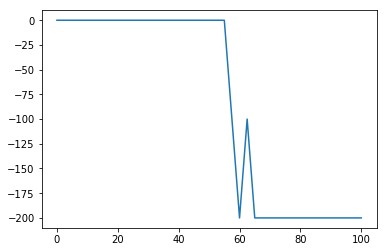

In [9]:
plt.plot(a,b)

In [10]:
price = np.linspace(start=0,stop=100,num=21)
q200 = []
q100 = []
q0 = []
qn100 = []
qn200 = []

In [11]:
pos = 0
for p in price:
    q200.append(p1.strategy.learner.qval((p, pos),[200]))
    q100.append(p1.strategy.learner.qval((p, pos),[100]))
    q0.append(p1.strategy.learner.qval((p, pos),[0]))
    qn100.append(p1.strategy.learner.qval((p, pos),[-100]))
    qn200.append(p1.strategy.learner.qval((p, pos),[-200]))

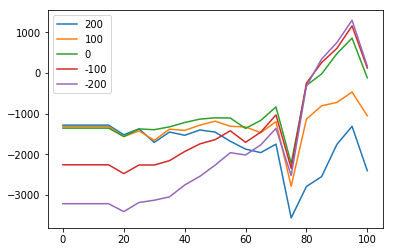

In [12]:
plt.figure
plt.plot(price, q200, label = '200')
plt.plot(price, q100, label = '100')
plt.plot(price, q0, label = '0')
plt.plot(price, qn100, label = '-100')
plt.plot(price, qn200, label = '-200')
plt.legend(loc=0)